### NCDC WEB SCRAPE

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import requests
import urllib.request
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://covid19.ncdc.gov.ng'
dfs = pd.read_html(url)
ncdc = dfs[0]

In [3]:
ncdc.head()

States Affected  No. of Cases (Lab Confirmed)  No. of Cases (on admission)  \
0           Lagos                         74480                         3200   
1             FCT                         20784                          544   
2          Rivers                         10981                          786   
3          Kaduna                          9306                           79   
4         Plateau                          9224                           79   

   No. Discharged  No. of Deaths  
0           70630            650  
1           20062            178  
2           10058            137  
3            9161             66  
4            9084             61

In [4]:
ncdc.to_csv('ncdc.csv', index=False)

In [5]:
pd.read_csv('ncdc.csv')

States Affected  No. of Cases (Lab Confirmed)  No. of Cases (on admission)  \
0            Lagos                         74480                         3200   
1              FCT                         20784                          544   
2           Rivers                         10981                          786   
3           Kaduna                          9306                           79   
4          Plateau                          9224                           79   
5              Oyo                          8455                          780   
6              Edo                          5750                          591   
7             Ogun                          5319                           97   
8        Akwa Ibom                          4172                          693   
9             Ondo                          4148                          272   
10            Kano                          4107                           66   
11           Kwara                          3671                          405   
12           Delta                          3081                          440   
13            Osun                          2761                           49   
14           Enugu                          2675                          112   
15        Nasarawa                          2424                           40   
16           Gombe                          2289                           22   
17         Katsina                          2214                           50   
18         Anambra                          2123                           47   
19          Ebonyi                          2048                           13   
20            Abia                          1859                           63   
21             Imo                          1721                           33   
22           Ekiti                          1609                          276   
23          Bauchi                          1568                           13   
24           Benue                          1469                           42   
25           Borno                          1344                            0   
26         Adamawa                          1153                           23   
27         Bayelsa                          1120                          101   
28          Taraba                          1062                           27   
29           Niger                          1001                           67   
30          Sokoto                           796                            2   
31          Jigawa                           573                           12   
32     Cross River                           542                           52   
33            Yobe                           501                            2   
34           Kebbi                           458                            9   
35         Zamfara                           253                            2   
36            Kogi                             5                            0   

    No. Discharged  No. of Deaths  
0            70630            650  
1            20062            178  
2            10058            137  
3             9161             66  
4             9084             61  
5             7493            182  
6             4957            202  
7             5143             79  
8             3437             42  
9             3800             76  
10            3930            111  
11            3207             59  
12            2556             85  
13            2627             85  
14            2534             29  
15            2345             39  
16            2223             44  
17            2129             35  
18            2057             19  
19            2003             32  
20            1771             25  
21            1650             38  
22            1311             22  
23            1538             17  
24            1403      

### John Hopkins Data Repository

In [6]:
url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/06e37b437cb069c770c56b0aea1724d85279ba92/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
global_confirmed = pd.read_csv(url1)

In [7]:
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/06e37b437cb069c770c56b0aea1724d85279ba92/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
global_recovered = pd.read_csv(url2)

In [8]:
url3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/06e37b437cb069c770c56b0aea1724d85279ba92/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
global_deaths = pd.read_csv(url3)

### External Data

In [9]:
budget_data = pd.read_csv('Budget data.csv')
covid_ex = pd.read_csv('covid_external.csv')
realgdp = pd.read_csv('RealGDP.csv') 

### DATA VIEWING AND CLEANING

In [10]:
global_confirmed.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/21/21  5/22/21  5/23/21  \
0        0        0        0        0  ...    65080    65486    65728   
1        0        0        0        0  ...   132153   132176   132209   
2        0        0        0        0  ...   126434   126651   126860   
3        0        0        0        0  ...    13569    13569    13569   
4        0        0        0        0  ...    31909    32149    32441   

   5/24/21  5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  5/30/21  
0    66275    66903    67743    68366    69130    70111    70761  
1   132215   132229   132244   132264   132285   132297   132309  
2   127107   127361   127646   127926   128198   128456   128725  
3    13569    13664    13671    13682    13693    13693    13693  
4    32623    32933    33338    33607    33944    34180    34366  

[5 rows x 499 columns]

In [11]:
global_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 499 entries, Province/State to 5/30/21
dtypes: float64(2), int64(495), object(2)
memory usage: 1.1+ MB


In [12]:
global_recovered.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/21/21  5/22/21  5/23/21  \
0        0        0        0        0  ...    55790    55889    56035   
1        0        0        0        0  ...   128425   128601   128732   
2        0        0        0        0  ...    88066    88208    88346   
3        0        0        0        0  ...    13234    13234    13234   
4        0        0        0        0  ...    26513    26775    26778   

   5/24/21  5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  5/30/21  
0    56295    56518    56711    56962    57119    57281    57450  
1   128826   128907   128978   129042   129097   129215   129308  
2    88497    88672    88861    89040    89232    89419    89625  
3    13234    13263    13381    13405    13416    13416    13416  
4    27087    27204    27467    27529    27577    27646    27766  

[5 rows x 499 columns]

In [13]:
global_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 499 entries, Province/State to 5/30/21
dtypes: float64(2), int64(495), object(2)
memory usage: 1017.6+ KB


In [14]:
global_deaths.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/21/21  5/22/21  5/23/21  \
0        0        0        0        0  ...     2782     2792     2802   
1        0        0        0        0  ...     2441     2442     2444   
2        0        0        0        0  ...     3405     3411     3418   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      709      715      725   

   5/24/21  5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  5/30/21  
0     2812     2836     2855     2869     2881     2899     2919  
1     2445     2447     2447     2447     2448     2449     2450  
2     3426     3433     3440     3448     3455     3460     3465  
3      127      127      127      127      127      127      127  
4      731      735      742      745      749      757      764  

[5 rows x 499 columns]

In [15]:
global_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 499 entries, Province/State to 5/30/21
dtypes: float64(2), int64(495), object(2)
memory usage: 1.1+ MB


In [16]:
budget_data.head()

states  Initial_budget (Bn)  Revised_budget (Bn)
0       Abia               136.60               102.70
1    Adamawa               183.30               139.31
2  Akwa-Ibom               597.73               366.00
3    Anambra               137.10               112.80
4     Bauchi               167.20               128.00

In [17]:
budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [18]:
covid_ex.head()

states         region  Population  Overall CCVI Index  Age  \
0        FCT  North Central     4865000                 0.3  0.0   
1    Plateau  North Central     4766000                 0.4  0.5   
2      Kwara  North Central     3524000                 0.3  0.4   
3  Nassarawa  North Central     2783000                 0.1  0.3   
4      Niger  North Central     6260000                 0.6  0.0   

   Epidemiological  Fragility  Health System  Population Density  \
0              0.9        0.4            0.6                 0.9   
1              0.4        0.8            0.3                 0.3   
2              0.3        0.2            0.4                 0.2   
3              0.5        0.9            0.0                 0.1   
4              0.6        0.3            0.7                 0.1   

   Socio-Economic   Transport Availability  Acute IHR  
0             0.6                      0.2       0.79  
1             0.5                      0.3       0.93  
2             0.6                      0.7       0.93  
3             0.6                      0.5       0.85  
4             0.8                      0.8       0.84

In [19]:
covid_ex.rename(columns = {'states':'States Affected'}, inplace = True)

In [20]:
covid_ex.head(2)

States Affected         region  Population  Overall CCVI Index  Age  \
0             FCT  North Central     4865000                 0.3  0.0   
1         Plateau  North Central     4766000                 0.4  0.5   

   Epidemiological  Fragility  Health System  Population Density  \
0              0.9        0.4            0.6                 0.9   
1              0.4        0.8            0.3                 0.3   

   Socio-Economic   Transport Availability  Acute IHR  
0             0.6                      0.2       0.79  
1             0.5                      0.3       0.93

In [21]:
covid_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   States Affected          37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [22]:
ncdc.rename(columns = {'No. of Cases (Lab Confirmed)' : 'Confirmed Cases', 'No. of Cases (on admission)': 'Admitted', 'No. Discharged': 'Discharged', 'No. of Deaths': 'Deaths'}, inplace= True)

In [23]:
ncdc.head()

States Affected  Confirmed Cases  Admitted  Discharged  Deaths
0           Lagos            74480      3200       70630     650
1             FCT            20784       544       20062     178
2          Rivers            10981       786       10058     137
3          Kaduna             9306        79        9161      66
4         Plateau             9224        79        9084      61

In [24]:
realgdp.head()

Year           Q1           Q2           Q3           Q4
0  2014  15438679.50  16084622.31  17479127.58  18150356.45
1  2015  16050601.38  16463341.91  17976234.59  18533752.07
2  2016  15943714.54  16218542.41  17555441.69  18213537.29
3  2017  15797965.83  16334719.27  17760228.17  18598067.07
4  2018  16096654.19  16580508.07  18081342.10  19041437.59

In [25]:
realgdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [26]:
realgdp['Year'] = pd.to_datetime(realgdp['Year'])

In [27]:
realgdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    7 non-null      datetime64[ns]
 1   Q1      7 non-null      float64       
 2   Q2      7 non-null      float64       
 3   Q3      7 non-null      float64       
 4   Q4      7 non-null      float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 408.0 bytes


In [28]:
realgdp

Year           Q1           Q2           Q3  \
0 1970-01-01 00:00:00.000002014  15438679.50  16084622.31  17479127.58   
1 1970-01-01 00:00:00.000002015  16050601.38  16463341.91  17976234.59   
2 1970-01-01 00:00:00.000002016  15943714.54  16218542.41  17555441.69   
3 1970-01-01 00:00:00.000002017  15797965.83  16334719.27  17760228.17   
4 1970-01-01 00:00:00.000002018  16096654.19  16580508.07  18081342.10   
5 1970-01-01 00:00:00.000002019  16434552.65  16931434.89  18494114.17   
6 1970-01-01 00:00:00.000002020  16740000.00  15890000.00  17820000.00   

            Q4  
0  18150356.45  
1  18533752.07  
2  18213537.29  
3  18598067.07  
4  19041437.59  
5  19530000.00  
6         0.00

In [29]:
realgdp['Year'] = realgdp['Year'].astype(str)

In [30]:
realgdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      object 
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), object(1)
memory usage: 408.0+ bytes


In [31]:
realgdp.iloc[0,0]= realgdp.iloc[0,0].replace('1970-01-01 00:00:00.000002014','2014')
realgdp.iloc[1,0]= realgdp.iloc[1,0].replace('1970-01-01 00:00:00.000002015','2015')
realgdp.iloc[2,0]= realgdp.iloc[2,0].replace('1970-01-01 00:00:00.000002016','2016')
realgdp.iloc[3,0]= realgdp.iloc[3,0].replace('1970-01-01 00:00:00.000002017','2017')
realgdp.iloc[4,0]= realgdp.iloc[4,0].replace('1970-01-01 00:00:00.000002018','2018')
realgdp.iloc[5,0]= realgdp.iloc[5,0].replace('1970-01-01 00:00:00.000002019','2019')
realgdp.iloc[6,0]= realgdp.iloc[6,0].replace('1970-01-01 00:00:00.000002020','2020')

In [32]:
realgdp

Year           Q1           Q2           Q3           Q4
0  2014  15438679.50  16084622.31  17479127.58  18150356.45
1  2015  16050601.38  16463341.91  17976234.59  18533752.07
2  2016  15943714.54  16218542.41  17555441.69  18213537.29
3  2017  15797965.83  16334719.27  17760228.17  18598067.07
4  2018  16096654.19  16580508.07  18081342.10  19041437.59
5  2019  16434552.65  16931434.89  18494114.17  19530000.00
6  2020  16740000.00  15890000.00  17820000.00         0.00

In [33]:
realgdp['Year']= pd.to_datetime(realgdp['Year'])

In [34]:
realgdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    7 non-null      datetime64[ns]
 1   Q1      7 non-null      float64       
 2   Q2      7 non-null      float64       
 3   Q3      7 non-null      float64       
 4   Q4      7 non-null      float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 408.0 bytes


In [35]:
realgdp

Year           Q1           Q2           Q3           Q4
0 2014-01-01  15438679.50  16084622.31  17479127.58  18150356.45
1 2015-01-01  16050601.38  16463341.91  17976234.59  18533752.07
2 2016-01-01  15943714.54  16218542.41  17555441.69  18213537.29
3 2017-01-01  15797965.83  16334719.27  17760228.17  18598067.07
4 2018-01-01  16096654.19  16580508.07  18081342.10  19041437.59
5 2019-01-01  16434552.65  16931434.89  18494114.17  19530000.00
6 2020-01-01  16740000.00  15890000.00  17820000.00         0.00

TODO B

In [36]:
Nigeria_daily_confirmed = global_confirmed.loc[(global_confirmed['Country/Region'] == 'Nigeria')]

In [37]:
Nigeria_daily_confirmed

Province/State Country/Region    Lat    Long  1/22/20  1/23/20  1/24/20  \
201            NaN        Nigeria  9.082  8.6753        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  5/21/21  5/22/21  5/23/21  5/24/21  \
201        0        0        0  ...   165944   165979   166019   166061   

     5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  5/30/21  
201   166098   166146   166191   166254   166285   166315  

[1 rows x 499 columns]

In [38]:
# tdcn --> total daily confirmed Nigeria

tdcn = Nigeria_daily_confirmed.drop(Nigeria_daily_confirmed.iloc[:, 0:4], axis = 1)

In [39]:
tdcn

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
201        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  5/21/21  5/22/21  5/23/21  5/24/21  5/25/21  \
201        0        0  ...   165944   165979   166019   166061   166098   

     5/26/21  5/27/21  5/28/21  5/29/21  5/30/21  
201   166146   166191   166254   166285   166315  

[1 rows x 495 columns]

In [40]:
tdcn_plot = tdcn.melt(var_name = 'Dates', value_name = 'Confirmed')

In [41]:
tdcn_plot

Dates  Confirmed
0    1/22/20          0
1    1/23/20          0
2    1/24/20          0
3    1/25/20          0
4    1/26/20          0
..       ...        ...
490  5/26/21     166146
491  5/27/21     166191
492  5/28/21     166254
493  5/29/21     166285
494  5/30/21     166315

[495 rows x 2 columns]

In [42]:
Nigeria_daily_recovery = global_recovered.loc[(global_recovered['Country/Region'] == 'Nigeria')]

In [43]:
Nigeria_daily_recovery

Province/State Country/Region    Lat    Long  1/22/20  1/23/20  1/24/20  \
186            NaN        Nigeria  9.082  8.6753        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  5/21/21  5/22/21  5/23/21  5/24/21  \
186        0        0        0  ...   156462   156468   156476   156492   

     5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  5/30/21  
186   156528   156529   156535   156546   156557   156558  

[1 rows x 499 columns]

In [44]:
Nigeria_daily_recovery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 186 to 186
Columns: 499 entries, Province/State to 5/30/21
dtypes: float64(2), int64(495), object(2)
memory usage: 3.9+ KB


In [45]:
# tdrn --> total daily recovery Nigeria

tdrn = Nigeria_daily_recovery.drop(Nigeria_daily_recovery.iloc[:,0:4], axis = 1)

In [46]:
tdrn_plot = tdrn.melt(var_name = 'Dates', value_name = 'Recovery')

In [47]:
tdrn_plot.tail()

Dates  Recovery
490  5/26/21    156529
491  5/27/21    156535
492  5/28/21    156546
493  5/29/21    156557
494  5/30/21    156558

In [48]:
Nigeria_daily_deaths = global_deaths.loc[(global_deaths['Country/Region'] == 'Nigeria')]

In [49]:
Nigeria_daily_deaths

Province/State Country/Region    Lat    Long  1/22/20  1/23/20  1/24/20  \
201            NaN        Nigeria  9.082  8.6753        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  5/21/21  5/22/21  5/23/21  5/24/21  \
201        0        0        0  ...     2067     2067     2067     2067   

     5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  5/30/21  
201     2071     2071     2071     2071     2071     2071  

[1 rows x 499 columns]

In [50]:
# tddn --> total daily deaths Nigeria

tddn = Nigeria_daily_deaths.drop(Nigeria_daily_deaths.iloc[:,0:4], axis = 1)

In [51]:
tddn_plot = tddn.melt(var_name = 'Dates', value_name = 'Deaths')

In [52]:
tddn_plot.tail()

Dates  Deaths
490  5/26/21    2071
491  5/27/21    2071
492  5/28/21    2071
493  5/29/21    2071
494  5/30/21    2071

### ANALYSIS

TODO 

In [53]:
ncdc.describe()

Confirmed Cases     Admitted    Discharged      Deaths
count        37.000000    37.000000     37.000000   37.000000
mean       5325.567568   245.648649   5010.243243   69.675676
std       12350.033092   551.280843  11727.662061  110.019204
min           5.000000     0.000000      3.000000    2.000000
25%        1120.000000    22.000000   1011.000000   22.000000
50%        2123.000000    52.000000   2057.000000   35.000000
75%        4148.000000   272.000000   3800.000000   76.000000
max       74480.000000  3200.000000  70630.000000  650.000000

In [54]:
ncdc.head()

States Affected  Confirmed Cases  Admitted  Discharged  Deaths
0           Lagos            74480      3200       70630     650
1             FCT            20784       544       20062     178
2          Rivers            10981       786       10058     137
3          Kaduna             9306        79        9161      66
4         Plateau             9224        79        9084      61

In [55]:
plot_data1 = ncdc.sort_values(by= 'Confirmed Cases', ascending= False).head(10)

In [56]:
plot_data1

States Affected  Confirmed Cases  Admitted  Discharged  Deaths
0           Lagos            74480      3200       70630     650
1             FCT            20784       544       20062     178
2          Rivers            10981       786       10058     137
3          Kaduna             9306        79        9161      66
4         Plateau             9224        79        9084      61
5             Oyo             8455       780        7493     182
6             Edo             5750       591        4957     202
7            Ogun             5319        97        5143      79
8       Akwa Ibom             4172       693        3437      42
9            Ondo             4148       272        3800      76

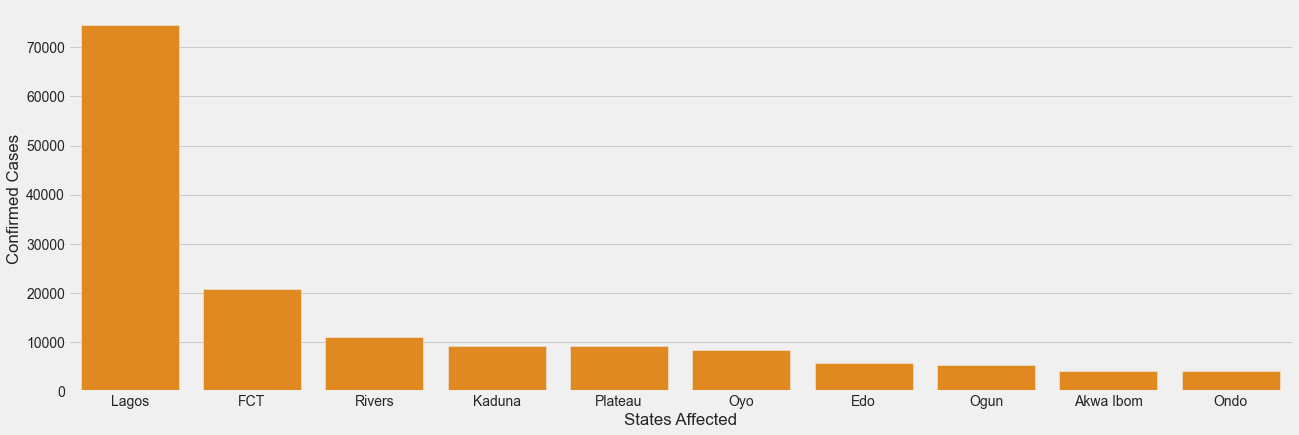

In [57]:
sns.catplot(y= 'Confirmed Cases' , x = 'States Affected', data= plot_data1, kind = 'bar', aspect = 3, height = 6, color= 'darkorange')

In [58]:
plot_data2 = ncdc.sort_values(by= 'Discharged', ascending = False).head(10)

In [59]:
plot_data2

States Affected  Confirmed Cases  Admitted  Discharged  Deaths
0            Lagos            74480      3200       70630     650
1              FCT            20784       544       20062     178
2           Rivers            10981       786       10058     137
3           Kaduna             9306        79        9161      66
4          Plateau             9224        79        9084      61
5              Oyo             8455       780        7493     182
7             Ogun             5319        97        5143      79
6              Edo             5750       591        4957     202
10            Kano             4107        66        3930     111
9             Ondo             4148       272        3800      76

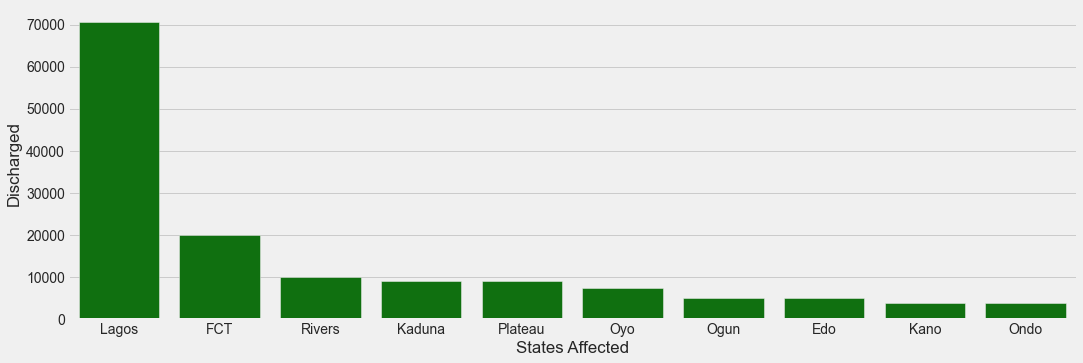

In [60]:
sns.catplot(y= 'Discharged' , x = 'States Affected', data= plot_data2, kind = 'bar', color = 'green', aspect = 3, height = 5)

In [61]:
plot_data3 = ncdc.sort_values(by= 'Deaths', ascending= False).head(10)

In [62]:
plot_data3

States Affected  Confirmed Cases  Admitted  Discharged  Deaths
0            Lagos            74480      3200       70630     650
6              Edo             5750       591        4957     202
5              Oyo             8455       780        7493     182
1              FCT            20784       544       20062     178
2           Rivers            10981       786       10058     137
10            Kano             4107        66        3930     111
12           Delta             3081       440        2556      85
13            Osun             2761        49        2627      85
7             Ogun             5319        97        5143      79
9             Ondo             4148       272        3800      76

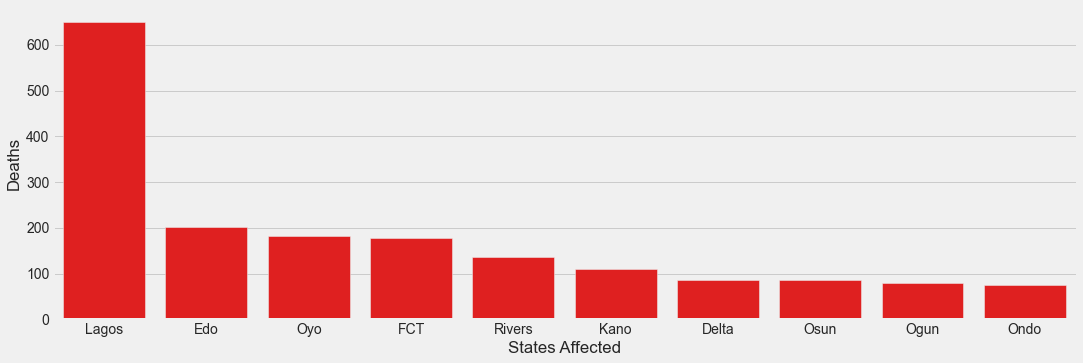

In [63]:
sns.catplot(y= 'Deaths' , x = 'States Affected', data= plot_data3, kind = 'bar', aspect = 3, height = 5, color = 'red')

[Text(0, 0, 'Lagos'),
 Text(1, 0, 'FCT'),
 Text(2, 0, 'Rivers'),
 Text(3, 0, 'Kaduna'),
 Text(4, 0, 'Plateau'),
 Text(5, 0, 'Oyo'),
 Text(6, 0, 'Edo'),
 Text(7, 0, 'Ogun'),
 Text(8, 0, 'Akwa Ibom'),
 Text(9, 0, 'Ondo'),
 Text(10, 0, 'Kano'),
 Text(11, 0, 'Kwara'),
 Text(12, 0, 'Delta'),
 Text(13, 0, 'Osun'),
 Text(14, 0, 'Enugu'),
 Text(15, 0, 'Nasarawa'),
 Text(16, 0, 'Gombe'),
 Text(17, 0, 'Katsina'),
 Text(18, 0, 'Anambra'),
 Text(19, 0, 'Ebonyi'),
 Text(20, 0, 'Abia'),
 Text(21, 0, 'Imo'),
 Text(22, 0, 'Ekiti'),
 Text(23, 0, 'Bauchi'),
 Text(24, 0, 'Benue'),
 Text(25, 0, 'Borno'),
 Text(26, 0, 'Adamawa'),
 Text(27, 0, 'Bayelsa'),
 Text(28, 0, 'Taraba'),
 Text(29, 0, 'Niger'),
 Text(30, 0, 'Sokoto'),
 Text(31, 0, 'Jigawa'),
 Text(32, 0, 'Cross River'),
 Text(33, 0, 'Yobe'),
 Text(34, 0, 'Kebbi'),
 Text(35, 0, 'Zamfara'),
 Text(36, 0, 'Kogi')]

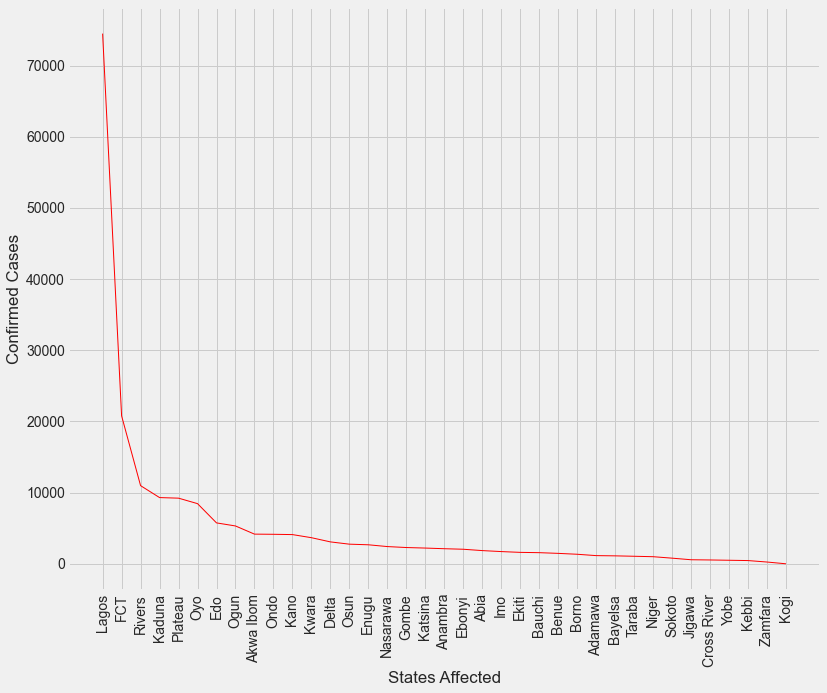

In [64]:
fig = plt.figure(figsize=(12, 10))
b= sns.lineplot(y = 'Confirmed Cases', x = 'States Affected', data = ncdc, linewidth= 1, color= 'r')
b.set_xticklabels(ncdc['States Affected'], rotation = 90)


[Text(0, 0, 'Lagos'),
 Text(1, 0, 'FCT'),
 Text(2, 0, 'Rivers'),
 Text(3, 0, 'Kaduna'),
 Text(4, 0, 'Plateau'),
 Text(5, 0, 'Oyo'),
 Text(6, 0, 'Edo'),
 Text(7, 0, 'Ogun'),
 Text(8, 0, 'Akwa Ibom'),
 Text(9, 0, 'Ondo'),
 Text(10, 0, 'Kano'),
 Text(11, 0, 'Kwara'),
 Text(12, 0, 'Delta'),
 Text(13, 0, 'Osun'),
 Text(14, 0, 'Enugu'),
 Text(15, 0, 'Nasarawa'),
 Text(16, 0, 'Gombe'),
 Text(17, 0, 'Katsina'),
 Text(18, 0, 'Anambra'),
 Text(19, 0, 'Ebonyi'),
 Text(20, 0, 'Abia'),
 Text(21, 0, 'Imo'),
 Text(22, 0, 'Ekiti'),
 Text(23, 0, 'Bauchi'),
 Text(24, 0, 'Benue'),
 Text(25, 0, 'Borno'),
 Text(26, 0, 'Adamawa'),
 Text(27, 0, 'Bayelsa'),
 Text(28, 0, 'Taraba'),
 Text(29, 0, 'Niger'),
 Text(30, 0, 'Sokoto'),
 Text(31, 0, 'Jigawa'),
 Text(32, 0, 'Cross River'),
 Text(33, 0, 'Yobe'),
 Text(34, 0, 'Kebbi'),
 Text(35, 0, 'Zamfara'),
 Text(36, 0, 'Kogi')]

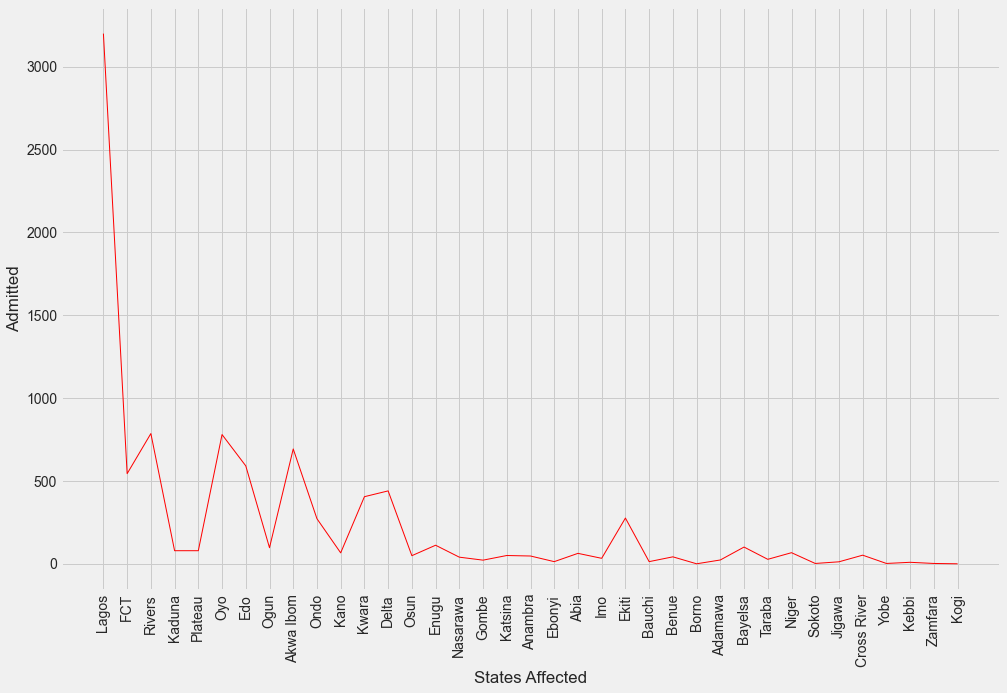

In [65]:
fig = plt.figure(figsize=(15, 10))
a=sns.lineplot(y = 'Admitted', x = 'States Affected', data = ncdc, linewidth= 1, color= 'r')
a.set_xticklabels(ncdc['States Affected'], rotation=90)

[Text(0, 0, 'Lagos'),
 Text(1, 0, 'FCT'),
 Text(2, 0, 'Rivers'),
 Text(3, 0, 'Kaduna'),
 Text(4, 0, 'Plateau'),
 Text(5, 0, 'Oyo'),
 Text(6, 0, 'Edo'),
 Text(7, 0, 'Ogun'),
 Text(8, 0, 'Akwa Ibom'),
 Text(9, 0, 'Ondo'),
 Text(10, 0, 'Kano'),
 Text(11, 0, 'Kwara'),
 Text(12, 0, 'Delta'),
 Text(13, 0, 'Osun'),
 Text(14, 0, 'Enugu'),
 Text(15, 0, 'Nasarawa'),
 Text(16, 0, 'Gombe'),
 Text(17, 0, 'Katsina'),
 Text(18, 0, 'Anambra'),
 Text(19, 0, 'Ebonyi'),
 Text(20, 0, 'Abia'),
 Text(21, 0, 'Imo'),
 Text(22, 0, 'Ekiti'),
 Text(23, 0, 'Bauchi'),
 Text(24, 0, 'Benue'),
 Text(25, 0, 'Borno'),
 Text(26, 0, 'Adamawa'),
 Text(27, 0, 'Bayelsa'),
 Text(28, 0, 'Taraba'),
 Text(29, 0, 'Niger'),
 Text(30, 0, 'Sokoto'),
 Text(31, 0, 'Jigawa'),
 Text(32, 0, 'Cross River'),
 Text(33, 0, 'Yobe'),
 Text(34, 0, 'Kebbi'),
 Text(35, 0, 'Zamfara'),
 Text(36, 0, 'Kogi')]

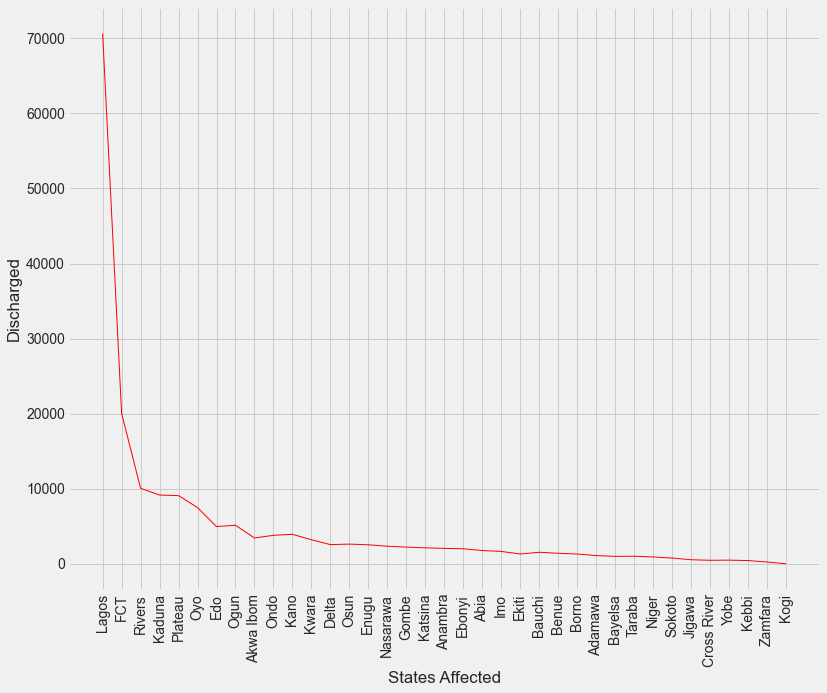

In [66]:
fig = plt.figure(figsize=(12, 10))
c= sns.lineplot(y = 'Discharged', x = 'States Affected', data = ncdc, linewidth= 1, color= 'r')
c.set_xticklabels(ncdc['States Affected'], rotation = 90)

[Text(0, 0, 'Lagos'),
 Text(1, 0, 'FCT'),
 Text(2, 0, 'Rivers'),
 Text(3, 0, 'Kaduna'),
 Text(4, 0, 'Plateau'),
 Text(5, 0, 'Oyo'),
 Text(6, 0, 'Edo'),
 Text(7, 0, 'Ogun'),
 Text(8, 0, 'Akwa Ibom'),
 Text(9, 0, 'Ondo'),
 Text(10, 0, 'Kano'),
 Text(11, 0, 'Kwara'),
 Text(12, 0, 'Delta'),
 Text(13, 0, 'Osun'),
 Text(14, 0, 'Enugu'),
 Text(15, 0, 'Nasarawa'),
 Text(16, 0, 'Gombe'),
 Text(17, 0, 'Katsina'),
 Text(18, 0, 'Anambra'),
 Text(19, 0, 'Ebonyi'),
 Text(20, 0, 'Abia'),
 Text(21, 0, 'Imo'),
 Text(22, 0, 'Ekiti'),
 Text(23, 0, 'Bauchi'),
 Text(24, 0, 'Benue'),
 Text(25, 0, 'Borno'),
 Text(26, 0, 'Adamawa'),
 Text(27, 0, 'Bayelsa'),
 Text(28, 0, 'Taraba'),
 Text(29, 0, 'Niger'),
 Text(30, 0, 'Sokoto'),
 Text(31, 0, 'Jigawa'),
 Text(32, 0, 'Cross River'),
 Text(33, 0, 'Yobe'),
 Text(34, 0, 'Kebbi'),
 Text(35, 0, 'Zamfara'),
 Text(36, 0, 'Kogi')]

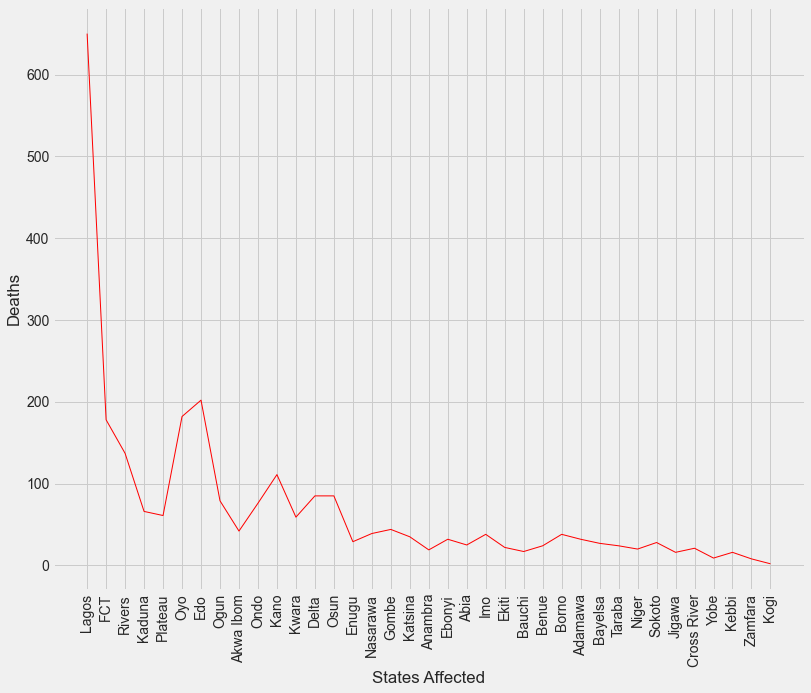

In [67]:
plt.figure(figsize=(12, 10))
d=sns.lineplot(y = 'Deaths', x = 'States Affected', data = ncdc, linewidth= 1, color= 'r')
d.set_xticklabels(ncdc['States Affected'], rotation = 90)

In [68]:
plt.figure(figsize = (200, 150))
g= sns.lineplot(y = 'Confirmed', x = 'Dates', data = tdcn_plot, linewidth= 8, color= 'r')


In [69]:
plt.figure(figsize = (200, 150))
sns.lineplot(x = 'Dates', y = 'Recovery', data = tdrn_plot, linewidth = 8, color= 'r')

<AxesSubplot:xlabel='Dates', ylabel='Recovery'>

In [70]:
plt.figure(figsize = (200, 150))
sns.lineplot(x = 'Dates', y = 'Deaths', data = tddn_plot, linewidth= 8, color= 'r')

<AxesSubplot:xlabel='Dates', ylabel='Deaths'>

In [71]:
daily_infection_rate = tdcn.diff(axis= 1)

In [72]:
daily_infection_rate

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
201      NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

     1/30/20  1/31/20  ...  5/21/21  5/22/21  5/23/21  5/24/21  5/25/21  \
201      0.0      0.0  ...     43.0     35.0     40.0     42.0     37.0   

     5/26/21  5/27/21  5/28/21  5/29/21  5/30/21  
201     48.0     45.0     63.0     31.0     30.0  

[1 rows x 495 columns]

In [73]:
daily_infection_rate_plot = daily_infection_rate.melt(var_name = 'Dates', value_name= 'Rate')

In [74]:
daily_infection_rate_plot

Dates  Rate
0    1/22/20   NaN
1    1/23/20   0.0
2    1/24/20   0.0
3    1/25/20   0.0
4    1/26/20   0.0
..       ...   ...
490  5/26/21  48.0
491  5/27/21  45.0
492  5/28/21  63.0
493  5/29/21  31.0
494  5/30/21  30.0

[495 rows x 2 columns]

In [75]:
plt.figure(figsize = (200, 150))

sns.lineplot(y = 'Rate', x = 'Dates', data = daily_infection_rate_plot, color= 'r')

<AxesSubplot:xlabel='Dates', ylabel='Rate'>

In [76]:
daily_infection_rate_plot.Rate.max()

2464.0

In [77]:
print(daily_infection_rate_plot[daily_infection_rate_plot.Rate == daily_infection_rate_plot.Rate.max()])

       Dates    Rate
367  1/23/21  2464.0


In [78]:
ncdc_and_ex = pd.merge(ncdc, covid_ex, on= 'States Affected')

In [79]:
ncdc_and_ex

States Affected  Confirmed Cases  Admitted  Discharged  Deaths  \
0            Lagos            74480      3200       70630     650   
1              FCT            20784       544       20062     178   
2           Rivers            10981       786       10058     137   
3           Kaduna             9306        79        9161      66   
4          Plateau             9224        79        9084      61   
5              Oyo             8455       780        7493     182   
6              Edo             5750       591        4957     202   
7             Ogun             5319        97        5143      79   
8        Akwa Ibom             4172       693        3437      42   
9             Ondo             4148       272        3800      76   
10            Kano             4107        66        3930     111   
11           Kwara             3671       405        3207      59   
12           Delta             3081       440        2556      85   
13            Osun             2761        49        2627      85   
14           Enugu             2675       112        2534      29   
15           Gombe             2289        22        2223      44   
16         Katsina             2214        50        2129      35   
17         Anambra             2123        47        2057      19   
18          Ebonyi             2048        13        2003      32   
19            Abia             1859        63        1771      25   
20             Imo             1721        33        1650      38   
21           Ekiti             1609       276        1311      22   
22          Bauchi             1568        13        1538      17   
23           Benue             1469        42        1403      24   
24           Borno             1344         0        1306      38   
25         Adamawa             1153        23        1098      32   
26         Bayelsa             1120       101         992      27   
27          Taraba             1062        27        1011      24   
28           Niger             1001        67         914      20   
29          Sokoto              796         2         766      28   
30          Jigawa              573        12         545      16   
31            Yobe              501         2         490       9   
32           Kebbi              458         9         433      16   
33         Zamfara              253         2         243       8   
34            Kogi                5         0           3       2   

           region  Population  Overall CCVI Index  Age  Epidemiological  \
0      South West    13992000                 0.0  0.1              1.0   
1   North Central     4865000                 0.3  0.0              0.9   
2     South South     7763000                 0.4  0.5              0.9   
3      North West     9227000                 0.7  0.1              0.9   
4   North Central     4766000                 0.4  0.5              0.4   
5      South West     8737000                 0.2  0.7              0.8   
6     South South     4705000                 0.1  0.9              0.8   
7      South West     5878000                 0.3  0.6              0.7   
8      South East     6093000                 0.7  0.8              0.7   
9      South West     5185000                 0.1  0.8              0.5   
10     North West    14726000                 0.6  0.2              0.1   
11  North Central     3524000                 0.3  0.4              0.3   
12    South South     6303000                 0.4  0.6              0.7   
13     South West     5252000                 0.0  0.7              0.4   
14     South East     4801000                 0.2  0.9              0.4   
15     North East     3692000                 1.0  0.4              0.4   
16     North West     8713000                 0.7  0.1              0.1   
17     South East     6050000                 0.6  0.9              1.0   
18    South South     3192000                 0.6  1.0              0.0   
19     South East 

In [80]:
ncdc_and_ex_plot = ncdc_and_ex.nlargest(10, 'Confirmed Cases')

In [81]:
ncdc_and_ex_plot

States Affected  Confirmed Cases  Admitted  Discharged  Deaths  \
0           Lagos            74480      3200       70630     650   
1             FCT            20784       544       20062     178   
2          Rivers            10981       786       10058     137   
3          Kaduna             9306        79        9161      66   
4         Plateau             9224        79        9084      61   
5             Oyo             8455       780        7493     182   
6             Edo             5750       591        4957     202   
7            Ogun             5319        97        5143      79   
8       Akwa Ibom             4172       693        3437      42   
9            Ondo             4148       272        3800      76   

          region  Population  Overall CCVI Index  Age  Epidemiological  \
0     South West    13992000                 0.0  0.1              1.0   
1  North Central     4865000                 0.3  0.0              0.9   
2    South South     7763000                 0.4  0.5              0.9   
3     North West     9227000                 0.7  0.1              0.9   
4  North Central     4766000                 0.4  0.5              0.4   
5     South West     8737000                 0.2  0.7              0.8   
6    South South     4705000                 0.1  0.9              0.8   
7     South West     5878000                 0.3  0.6              0.7   
8     South East     6093000                 0.7  0.8              0.7   
9     South West     5185000                 0.1  0.8              0.5   

   Fragility  Health System  Population Density  Socio-Economic  \
0        0.3            0.1                 1.0             0.1   
1        0.4            0.6                 0.9             0.6   
2        0.6            0.6                 0.9             0.1   
3        0.8            0.9                 0.4             0.6   
4        0.8            0.3                 0.3             0.5   
5        0.2            0.8                 0.6             0.2   
6        0.1            0.1                 0.5             0.4   
7        0.5            0.6                 0.6             0.0   
8        0.6            0.8                 0.8             0.5   
9        0.1            0.3                 0.6             0.3   

    Transport Availability  Acute IHR  
0                      0.4       0.93  
1                      0.2       0.79  
2                      0.1       1.00  
3                      0.4       0.86  
4                      0.3       0.93  
5                      0.3       1.06  
6                      0.3       1.09  
7                      0.2       1.07  
8                      0.1       1.01  
9                      0.3       1.04

In [82]:
ncdc_and_ex_plot.sort_values('Confirmed Cases', ascending= False)

States Affected  Confirmed Cases  Admitted  Discharged  Deaths  \
0           Lagos            74480      3200       70630     650   
1             FCT            20784       544       20062     178   
2          Rivers            10981       786       10058     137   
3          Kaduna             9306        79        9161      66   
4         Plateau             9224        79        9084      61   
5             Oyo             8455       780        7493     182   
6             Edo             5750       591        4957     202   
7            Ogun             5319        97        5143      79   
8       Akwa Ibom             4172       693        3437      42   
9            Ondo             4148       272        3800      76   

          region  Population  Overall CCVI Index  Age  Epidemiological  \
0     South West    13992000                 0.0  0.1              1.0   
1  North Central     4865000                 0.3  0.0              0.9   
2    South South     7763000                 0.4  0.5              0.9   
3     North West     9227000                 0.7  0.1              0.9   
4  North Central     4766000                 0.4  0.5              0.4   
5     South West     8737000                 0.2  0.7              0.8   
6    South South     4705000                 0.1  0.9              0.8   
7     South West     5878000                 0.3  0.6              0.7   
8     South East     6093000                 0.7  0.8              0.7   
9     South West     5185000                 0.1  0.8              0.5   

   Fragility  Health System  Population Density  Socio-Economic  \
0        0.3            0.1                 1.0             0.1   
1        0.4            0.6                 0.9             0.6   
2        0.6            0.6                 0.9             0.1   
3        0.8            0.9                 0.4             0.6   
4        0.8            0.3                 0.3             0.5   
5        0.2            0.8                 0.6             0.2   
6        0.1            0.1                 0.5             0.4   
7        0.5            0.6                 0.6             0.0   
8        0.6            0.8                 0.8             0.5   
9        0.1            0.3                 0.6             0.3   

    Transport Availability  Acute IHR  
0                      0.4       0.93  
1                      0.2       0.79  
2                      0.1       1.00  
3                      0.4       0.86  
4                      0.3       0.93  
5                      0.3       1.06  
6                      0.3       1.09  
7                      0.2       1.07  
8                      0.1       1.01  
9                      0.3       1.04

In [83]:
ncdc_and_ex_plot.columns

Index(['States Affected', 'Confirmed Cases', 'Admitted', 'Discharged',
       'Deaths', 'region', 'Population', 'Overall CCVI Index', 'Age',
       'Epidemiological', 'Fragility', 'Health System', 'Population Density',
       'Socio-Economic', ' Transport Availability', 'Acute IHR'],
      dtype='object')

In [84]:
ncdc_and_ex_plot.sort_values('Overall CCVI Index', ascending= False)

States Affected  Confirmed Cases  Admitted  Discharged  Deaths  \
3          Kaduna             9306        79        9161      66   
8       Akwa Ibom             4172       693        3437      42   
2          Rivers            10981       786       10058     137   
4         Plateau             9224        79        9084      61   
1             FCT            20784       544       20062     178   
7            Ogun             5319        97        5143      79   
5             Oyo             8455       780        7493     182   
6             Edo             5750       591        4957     202   
9            Ondo             4148       272        3800      76   
0           Lagos            74480      3200       70630     650   

          region  Population  Overall CCVI Index  Age  Epidemiological  \
3     North West     9227000                 0.7  0.1              0.9   
8     South East     6093000                 0.7  0.8              0.7   
2    South South     7763000                 0.4  0.5              0.9   
4  North Central     4766000                 0.4  0.5              0.4   
1  North Central     4865000                 0.3  0.0              0.9   
7     South West     5878000                 0.3  0.6              0.7   
5     South West     8737000                 0.2  0.7              0.8   
6    South South     4705000                 0.1  0.9              0.8   
9     South West     5185000                 0.1  0.8              0.5   
0     South West    13992000                 0.0  0.1              1.0   

   Fragility  Health System  Population Density  Socio-Economic  \
3        0.8            0.9                 0.4             0.6   
8        0.6            0.8                 0.8             0.5   
2        0.6            0.6                 0.9             0.1   
4        0.8            0.3                 0.3             0.5   
1        0.4            0.6                 0.9             0.6   
7        0.5            0.6                 0.6             0.0   
5        0.2            0.8                 0.6             0.2   
6        0.1            0.1                 0.5             0.4   
9        0.1            0.3                 0.6             0.3   
0        0.3            0.1                 1.0             0.1   

    Transport Availability  Acute IHR  
3                      0.4       0.86  
8                      0.1       1.01  
2                      0.1       1.00  
4                      0.3       0.93  
1                      0.2       0.79  
7                      0.2       1.07  
5                      0.3       1.06  
6                      0.3       1.09  
9                      0.3       1.04  
0                      0.4       0.93

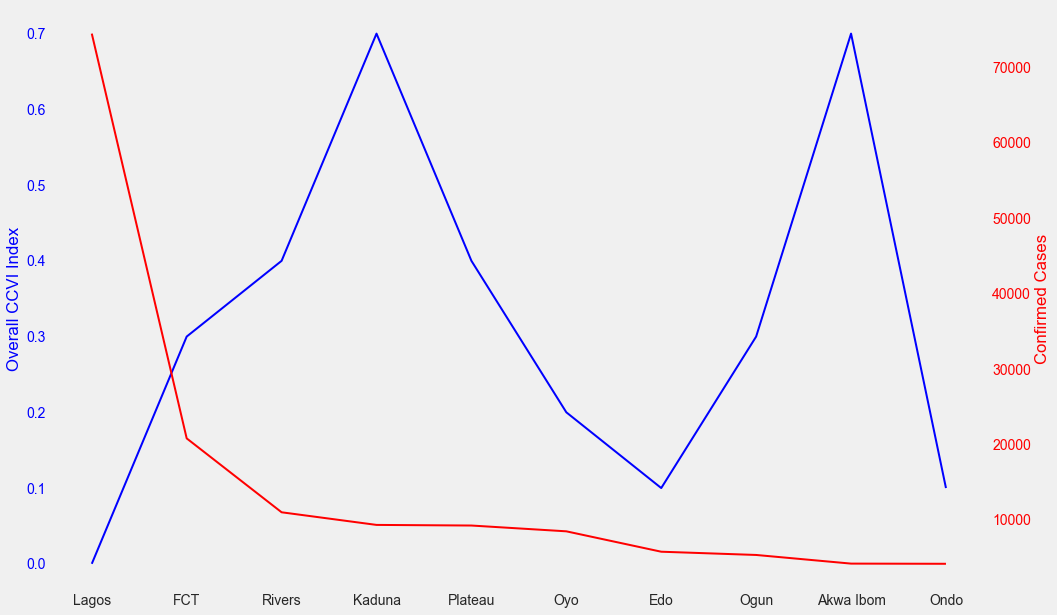

In [85]:

fig = plt.figure(figsize= (15, 10))
ax1 = fig.add_subplot(111)
ax1.plot(ncdc_and_ex_plot['States Affected'], ncdc_and_ex_plot['Overall CCVI Index'], 'b-', linewidth= 2)
ax1.set_ylabel('Overall CCVI Index', color= 'b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
plt.grid(False)

ax2 = ax1.twinx()
ax2.plot(ncdc_and_ex_plot['States Affected'], ncdc_and_ex_plot['Confirmed Cases'], 'r-', linewidth= 2)
ax2.set_ylabel('Confirmed Cases', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.grid(False)

The covid-19 community vulnerability index generally refers to how well  community handles the repercussion of the covid-19 outbreak. A high vulnerability index indicates that the state is great chances of being infected and vice versa. 

A number of factors are responsible for the high index in these state.
- Socioeconomic vulnerability like: education, poverty, access to information
- Population density
- Housing and transportation issues like household crowding, sanitation, road connectivity
* Epidemiological factors like infectious diseases prevalence, smoking
* Health system factors
* Fragility like civil unrest, food insecurity
* Age (the number of people aged 65 and above).


However, the above plot does not seem to follow this rule as we have the state with the lowest **Overall CCVI Index** with the highest number of **Confirmed Cases** and vise versa.

This is tricky as we have Lagos and Abuja having the highest number of cases. In my opinion, this may be as a result of the international airports located in both regions with people coming in from overseas(some being infected and spreading the virus) adding to the number of already confirmed cases and backed by population density.

<AxesSubplot:xlabel='Population Density', ylabel='Confirmed Cases'>

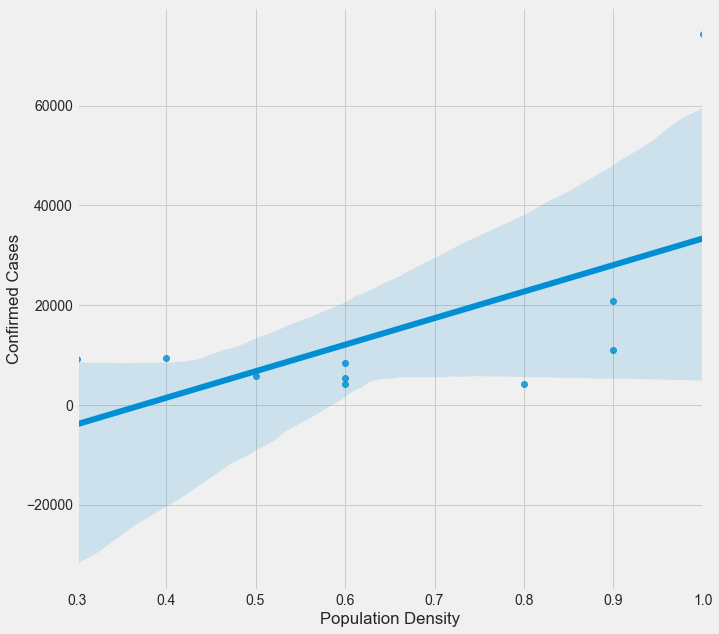

In [86]:
plt.figure(figsize=(10,10))
sns.regplot(y= 'Confirmed Cases', x= 'Population Density', data= ncdc_and_ex_plot)

* It can be deduced from the regression line drawn above that there is a positive correlation between the population density and the Confirmed Cases. This shows that the more the number of people in a given space, the higher the rate of transmission if anyone comes in contact with an infected person. this is the reason the importance of social distancing could not be overemphasised.


<AxesSubplot:xlabel='Health System', ylabel='Deaths'>

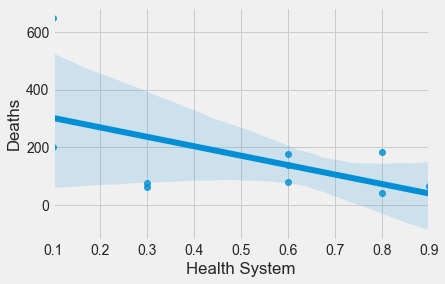

In [87]:
sns.regplot(x= 'Health System', y= 'Deaths', data = ncdc_and_ex_plot)

It can be seen from the above figure that inadequate health care plays a huge role is reducing the number of deaths. There is a better chance of survival when a patience is admitted to a well-equiped health care facility.



<AxesSubplot:xlabel='Socio-Economic', ylabel='Confirmed Cases'>

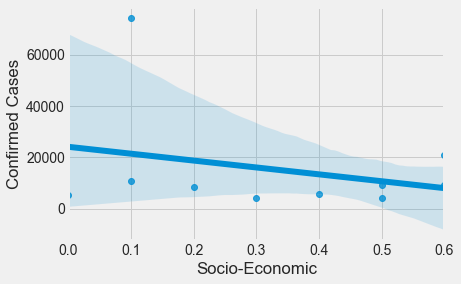

In [88]:
sns.regplot(y= 'Confirmed Cases', x= 'Socio-Economic', data = ncdc_and_ex_plot)

We can see from the above plot that the higher the average socio-economic class of a state, the lower the number of cases. 

To give a few practical examples:
Car owners are less likely to contract the disease than people who use comercial transport.

People who own smart devices are better informed about preventive measures that people don't and people who get informed through word of mouth; and the list goes on.

<AxesSubplot:xlabel='Acute IHR', ylabel='Deaths'>

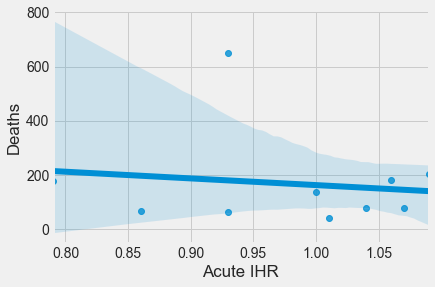

In [89]:
sns.regplot(x= 'Acute IHR', y= 'Deaths', data = ncdc_and_ex_plot)

With the above plot showing a negative correlation between 'Acute IHR' and 'Deaths', it is evident that a country must adhere to the International Health Regulations provided and also, health organisations must be encouraged to do better to improve these regulations and save more lives.

<AxesSubplot:xlabel='Overall CCVI Index', ylabel='Confirmed Cases'>

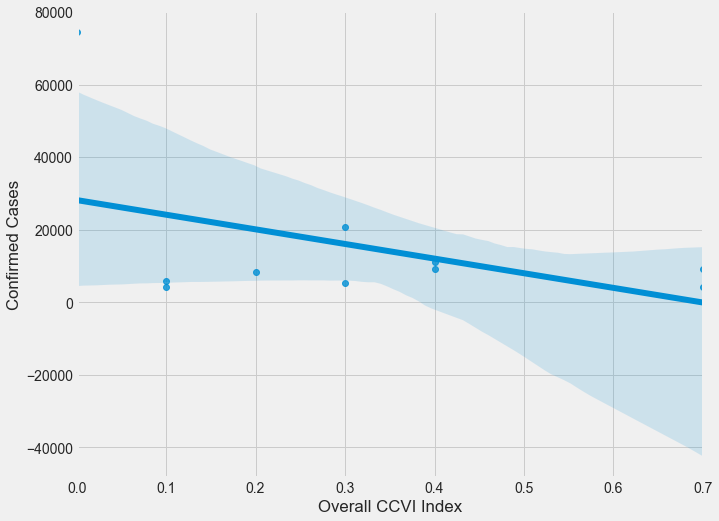

In [90]:
plt.figure(figsize=(10,8))
sns.regplot(x= 'Overall CCVI Index', y= 'Confirmed Cases', data= ncdc_and_ex_plot)

The **Overall CCVI Index** and **Confirmed Cases** have a negative correlation rather that the expected possitive correlation which is unusual. 

In [91]:
realgdp

Year           Q1           Q2           Q3           Q4
0 2014-01-01  15438679.50  16084622.31  17479127.58  18150356.45
1 2015-01-01  16050601.38  16463341.91  17976234.59  18533752.07
2 2016-01-01  15943714.54  16218542.41  17555441.69  18213537.29
3 2017-01-01  15797965.83  16334719.27  17760228.17  18598067.07
4 2018-01-01  16096654.19  16580508.07  18081342.10  19041437.59
5 2019-01-01  16434552.65  16931434.89  18494114.17  19530000.00
6 2020-01-01  16740000.00  15890000.00  17820000.00         0.00

In [92]:
realgdp.iloc[0, 1:5].sum()

67152785.84

In [93]:
realgdp.describe()

Q1            Q2            Q3            Q4
count  7.000000e+00  7.000000e+00  7.000000e+00  7.000000e+00
mean   1.607174e+07  1.635760e+07  1.788093e+07  1.600959e+07
std    4.225676e+05  3.423407e+05  3.442170e+05  7.075830e+06
min    1.543868e+07  1.589000e+07  1.747913e+07  0.000000e+00
25%    1.587084e+07  1.615158e+07  1.765783e+07  1.818195e+07
50%    1.605060e+07  1.633472e+07  1.782000e+07  1.853375e+07
75%    1.626560e+07  1.652192e+07  1.802879e+07  1.881975e+07
max    1.674000e+07  1.693143e+07  1.849411e+07  1.953000e+07

In [94]:
pandemic_impact_plot = pd.melt(realgdp, id_vars= ['Year'], value_vars= ['Q1', 'Q2', 'Q3', 'Q4'], var_name= 'Quaters', value_name= 'GDP')

In [95]:
pandemic_impact_plot['Year'] = pandemic_impact_plot['Year'].dt.year

In [96]:
pandemic_impact_plot.head(3)

Year Quaters          GDP
0  2014      Q1  15438679.50
1  2015      Q1  16050601.38
2  2016      Q1  15943714.54

In [97]:
pandemic_impact_plot.sort_values('GDP')

Year Quaters          GDP
27  2020      Q4         0.00
0   2014      Q1  15438679.50
3   2017      Q1  15797965.83
13  2020      Q2  15890000.00
2   2016      Q1  15943714.54
1   2015      Q1  16050601.38
7   2014      Q2  16084622.31
4   2018      Q1  16096654.19
9   2016      Q2  16218542.41
10  2017      Q2  16334719.27
5   2019      Q1  16434552.65
8   2015      Q2  16463341.91
11  2018      Q2  16580508.07
6   2020      Q1  16740000.00
12  2019      Q2  16931434.89
14  2014      Q3  17479127.58
16  2016      Q3  17555441.69
17  2017      Q3  17760228.17
20  2020      Q3  17820000.00
15  2015      Q3  17976234.59
18  2018      Q3  18081342.10
21  2014      Q4  18150356.45
23  2016      Q4  18213537.29
19  2019      Q3  18494114.17
22  2015      Q4  18533752.07
24  2017      Q4  18598067.07
25  2018      Q4  19041437.59
26  2019      Q4  19530000.00

In [98]:
pandemic_impact_plot.describe()

Year           GDP
count    28.0000  2.800000e+01
mean   2017.0000  1.657996e+07
std       2.0367  3.438177e+06
min    2014.0000  0.000000e+00
25%    2015.0000  1.609365e+07
50%    2017.0000  1.683572e+07
75%    2019.0000  1.809860e+07
max    2020.0000  1.953000e+07

In [99]:
pandemic_impact_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     28 non-null     int64  
 1   Quaters  28 non-null     object 
 2   GDP      28 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 800.0+ bytes


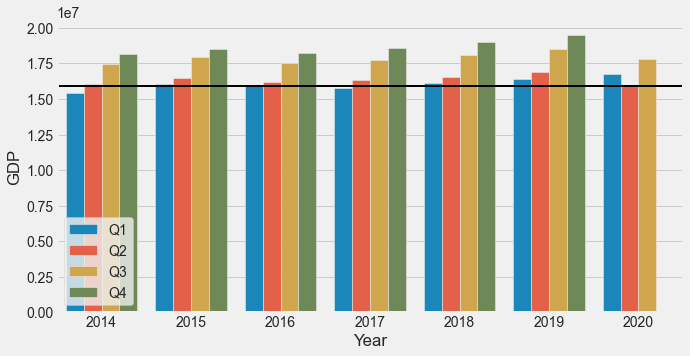

In [100]:
plt.figure(figsize= (10,5))
sns.barplot(x='Year', y='GDP',hue= 'Quaters', data = pandemic_impact_plot)
plt.legend(loc= 'lower left')
plt.axhline(y = 15890000.00, linewidth = 2, color = 'black')

Nigeria's GDP in the first quarter of 2020 was the highest of all first quarters since 2014 but the positive momentum was impeded due to the impact of the COVID-19 outbreak who's effect is seen in the second quarter of the year 2020 which also corresponds with the lockdown period.

The 2020 Q2 was the first time Nigerias GDP didn't increase on a quarterly basis since 2014 and is also recorded as the 3rd least GDP since 2014(with data for 2020 Q4 yet to be collated/recorded).

In [101]:
budget_data

states  Initial_budget (Bn)  Revised_budget (Bn)
0          Abia               136.60               102.70
1       Adamawa               183.30               139.31
2     Akwa-Ibom               597.73               366.00
3       Anambra               137.10               112.80
4        Bauchi               167.20               128.00
5       Bayelsa               242.18               183.15
6         Benue               189.00               119.00
7         Borno               146.80               108.80
8   Cross River              1100.00               147.10
9         Delta               395.50               282.30
10       Ebonyi               178.40               131.80
11          Edo               179.20               128.80
12        Ekiti               124.50                91.10
13        Enugu               169.56               146.40
14        Gombe               130.83               107.40
15          Imo               197.60               108.30
16       Jigawa               152.92               124.00
17       Kaduna               259.25               223.60
18         Kano               200.00               138.00
19      Katsina               244.00               213.00
20        Kebbi               138.00                99.60
21         Kogi               176.00               102.00
22        Kwara               160.00               120.00
23        Lagos              1680.00               920.50
24     Nasarawa               108.40                62.96
25        Niger               155.00                98.00
26         Ogun               449.90               280.00
27         Ondo               187.80               151.40
28         Osun               119.60                82.20
29          Oyo               213.00               174.00
30      Plateau               177.30               122.00
31       Rivers               530.80               300.40
32       Sokoto               202.40               153.00
33       Taraba               215.00               150.50
34         Yobe               108.00                86.00
35      Zamfara               188.50               127.30
36          FCT               278.78               199.00

([<matplotlib.axis.YTick at 0x7fa971a81c10>,
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

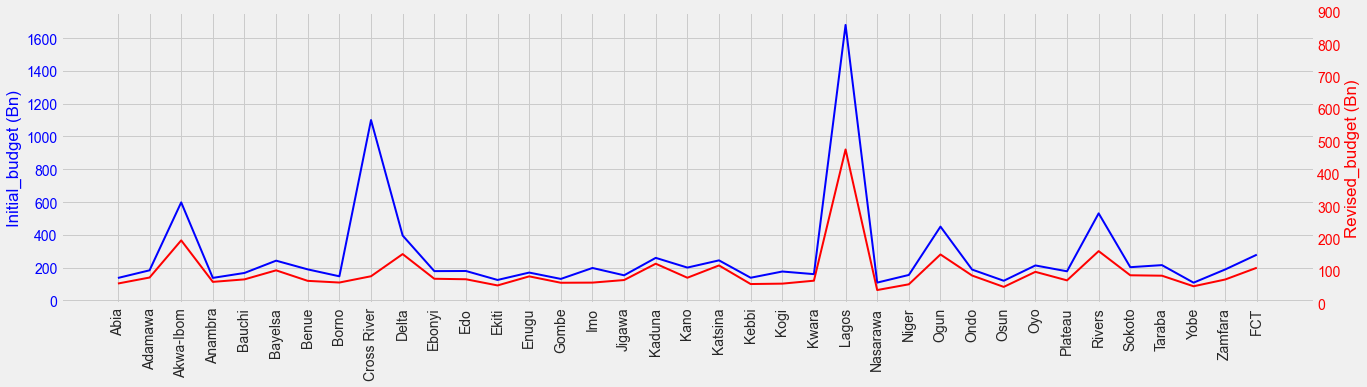

In [102]:
fig = plt.figure(figsize = (20,5))
x1 = fig.add_subplot(111)
x1.plot(budget_data.states, budget_data['Initial_budget (Bn)'], color = 'b', linewidth = 2)
x1.set_ylabel('Initial_budget (Bn)', color = 'b')
for a in x1.get_yticklabels():
    a.set_color('b')
# plt.grid(False)
x1.set_xticklabels(labels= budget_data.states, rotation = 'vertical')
   
    
x2 = x1.twinx()
x1.plot(budget_data.states, budget_data['Revised_budget (Bn)'], color = 'r', linewidth = 2)
x2.set_ylabel('Revised_budget (Bn)', color = 'r')
for b in x2.get_yticklabels():
    b.set_color('r')
plt.grid(False)
plt.yticks(range(0,1000, 100))

In [103]:
difference = budget_data.loc[0:, ['Initial_budget (Bn)', 'Revised_budget (Bn)']].diff(axis=1)

In [104]:
difference.head(10)

Initial_budget (Bn)  Revised_budget (Bn)
0                  NaN               -33.90
1                  NaN               -43.99
2                  NaN              -231.73
3                  NaN               -24.30
4                  NaN               -39.20
5                  NaN               -59.03
6                  NaN               -70.00
7                  NaN               -38.00
8                  NaN              -952.90
9                  NaN              -113.20

In [105]:
budget_data['Revised_budget (Bn)'].sum()-budget_data['Initial_budget (Bn)'].sum()

-3889.7300000000014

the revised budget has approximately 3.9 Trillion Naira deficit

## CONCLUSION
This project was carried out to analyse the general impact of the covid-19 outbreak on Nigeria; ranging from the number of confirmed cases, admissions, discharges and deaths recorded around the 36 states and Federal Capital Teritory of Nigeria.

The economic Impact of the pandemic was also analysed, with Nigeria seeing a decline in its real gdp in the second quarter of the year 2020 as a result of the lockdown. from the analysis provided, it was shown that Nigeria failed to maintain its quarterly gdp uptrend for the first time since 2014 in the year 2020 with the real gdp of the 2nd quarter being significantly less than that of the first quater.

Some other factors which contributed to the spread of the virus were also analysed ranging from the total population, population indeces, socio-economic factors etc from the various states in nigeria. These analysis was carried from combined datasets.

Detailed plots were provided for easy visualisation and understanding of analytical findings in this project. 

Through this analysis, a lot of key 'what', 'why', 'when' questions have been answered.